In [23]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Stratified sampling

Split the $x$ axis in ``N=50`` strata, and sample each stratum ``M=50`` times. Use it to construct the histogram of a normal distribution. From the plot you can see that the stratified sampling histogram is somehow closer to the analytical curve.

In [41]:
N = 50 # number of strata
M = 50 # samples per stratum

In [39]:
normal_samples = []
for i in range(1, N+1): # loop for every stratum
    # sample M uniform samples
    M_uniform_samples = np.random.uniform(0, 1, M)
    
    # transform into samples of CDF within stratum
    M_cdf_samples = (i-1)/N + M_uniform_samples/N
    
    # transform into quantiles within stratum
    M_normal_samples = [norm.ppf(q) for q in M_cdf_samples]
    
    normal_samples += M_normal_samples

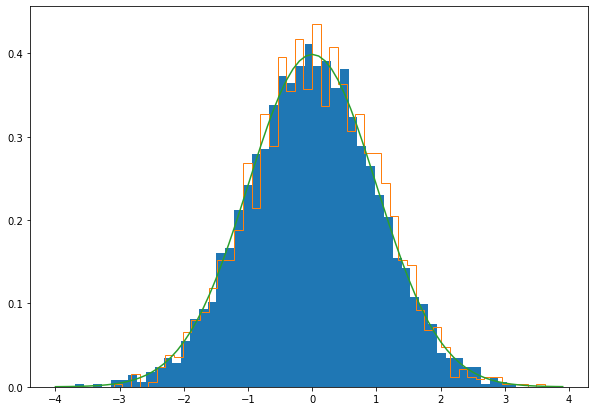

In [53]:
plt.figure(figsize=(10,7))
plt.hist(normal_samples, bins=N, density=True)
plt.hist(np.random.normal(size=N*M), bins=N, histtype="step", density=True)
plt.plot(np.arange(-4, 4, 0.1), norm.pdf(np.arange(-4, 4, 0.1)))
plt.show()